### Python Exercise: K-Means 2

Analyze data “ilustrasi k means.csv”
- Plot the data using scatter plot
- Determine the optimal number of cluster
- Elbow method
- Silhouette method
- Plot the data and clustering result (optimal number of cluster) using
scatter plot

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('ilustrasi k means.csv', sep=';')

In [9]:
df.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


In [10]:
from sklearn.cluster import KMeans

In [11]:
X = df[['tinggibadan','tinggibadanistri']]

In [12]:
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

<AxesSubplot:>

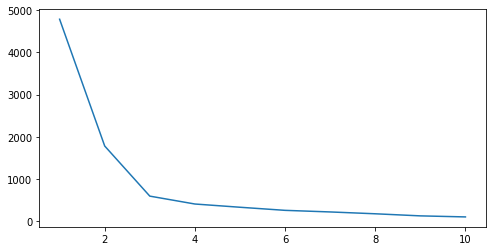

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)

C:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


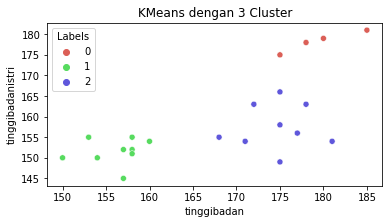

In [14]:
km5 = KMeans(n_clusters=3).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(6,3))
sns.scatterplot(X['tinggibadan'], X['tinggibadanistri'], hue=X['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans dengan 3 Cluster')
plt.show()

### Python Exercise: K-Means 1

Analyze generated data from make_blobs
- Set 3 main spots (random_state = 42)
- Plot the data using scatter plot
- Determine the optimal number of cluster based on your
observation
- Plot the data and clustering result (optimal number of cluster) using
scatter plot

In [15]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [17]:
features, true_labels = make_blobs(
    n_samples=200, centers=3, cluster_std=2.75, random_state=42
)

In [18]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [19]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [21]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [22]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [23]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [24]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [25]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [26]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [27]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

In [28]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

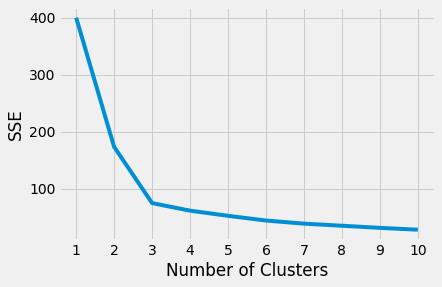

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

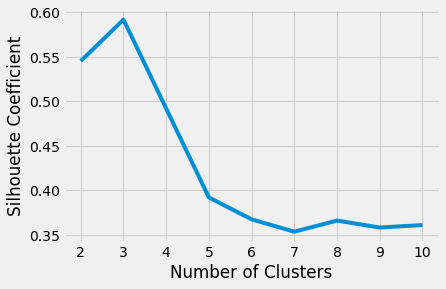

In [31]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [33]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [34]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

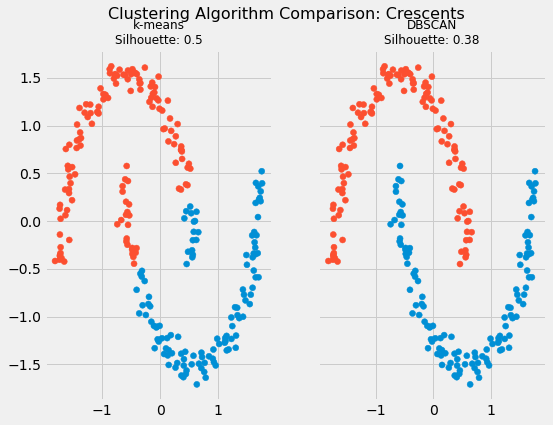

In [35]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()